# Bloch Simulation - bSSFP #

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [9]:
# the parameters used in this simulation 
#time unit --- second
proton_density = 1.0
T1 = 1.0 
T2 = 100e-3
TR = 10e-3
TE = 5e-3
# tip angle alpha 10, 30, 90 degree
tip_angle = [10,30,90]
#initial magnetisation 
M0 = np.asarray([[0],[0],[1]],dtype = float)
TR_Num = 1000 #Repeat the excitation 1000 times

In [12]:
# FUNCTIONS
#RF pulse excitation matrix
def RF_pulse(alpha, phi):
    #The RF pulse tip the spin "alpha" degree from z axis
    #and a phase shift of "phi" degree clockwise from x axis
    
    #convert in to radians 
    a = math.radians(alpha)
    p = math.radians(phi)
    #each term of the matrix
    r11 = math.cos(a)*math.sin(p)**2 + math.cos(p)**2
    r12 = (1 - math.cos(a))*math.cos(p)*math.sin(p)
    r13 = - math.sin(a)*math.sin(p)
    r21 = (1 - math.cos(a))*math.cos(p)*math.sin(p)
    r22 = math.cos(a)*math.cos(p)**2 + math.sin(p)**2
    r23 = math.sin(a)*math.cos(p)
    r31 = math.sin(a)*math.sin(p)
    r32 = - math.sin(a)*math.cos(p)
    r33 = math.cos(a)
    R = np.asarray([[r11,r12,r13],[r21,r22,r23],[r31,r32,r33]], dtype = float)
    
    return R

#T1 recovery, T2 decay terms effect for time t
def Relaxation(t, T1, T2):
    e2 = np.exp(-t/T2)
    e1 = np.exp(-t/T1)
    E = np.asarray([[e2 , 0, 0],[0, e2, 0],[0, 0, e1]], dtype = float)
    
    return E

#Precession term effect on off-resonance (f_off Hz) spin at time t
def Precession(f_off, t):
    #free-precession angle beta
    b = f_off*t*2*math.pi
    #rad
    #b = math.radians(beta)
    P = np.asarray([[math.cos(b), math.sin(b), 0],[-math.sin(b), math.cos(b), 0],[0, 0, 1]], dtype = float)
    
    return P
    

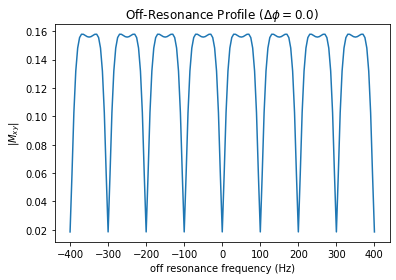

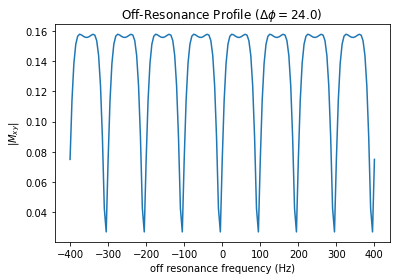

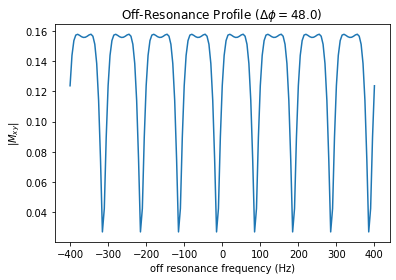

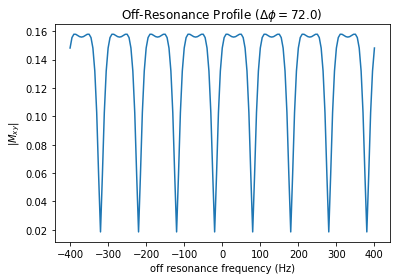

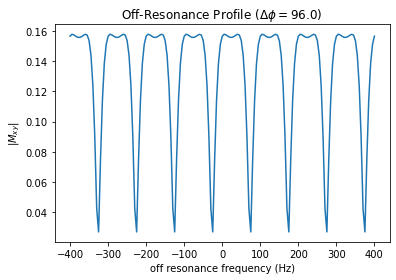

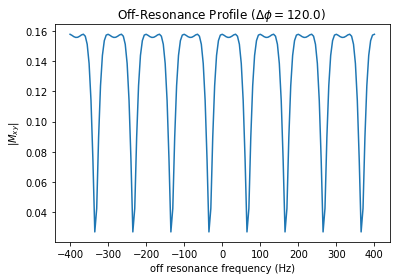

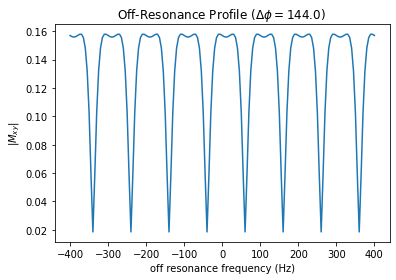

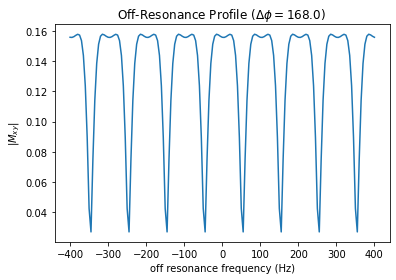

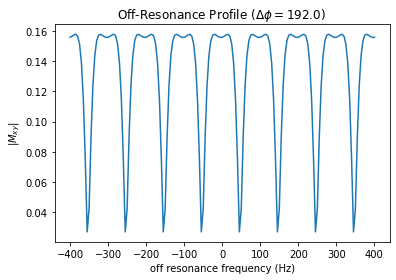

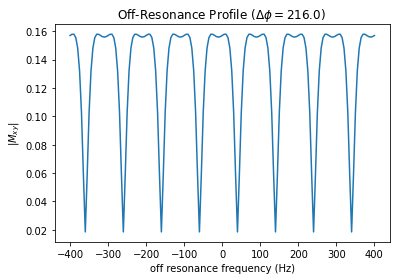

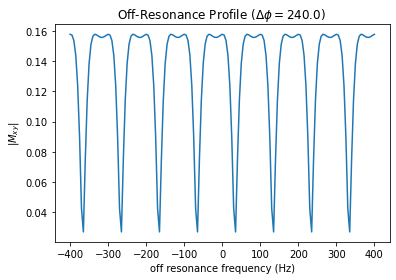

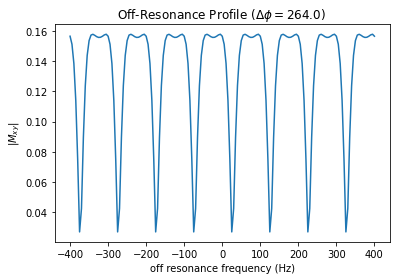

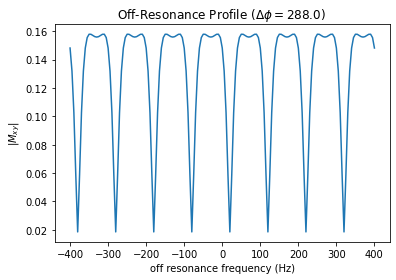

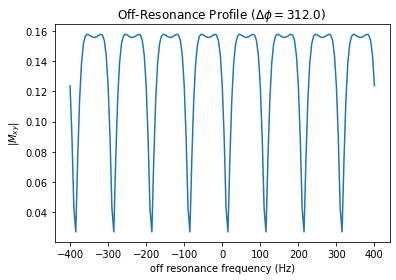

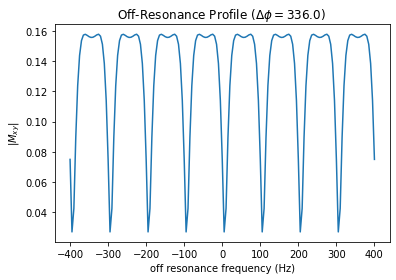

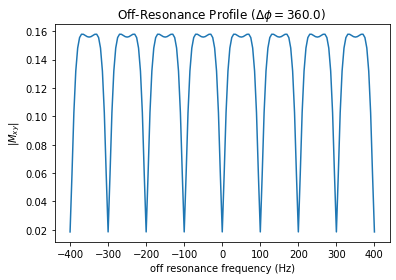

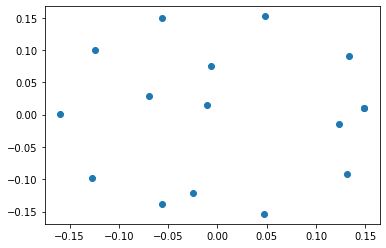

In [13]:
TR = 0.01
TE = TR/2
T1 = 1
T2 = 0.1
phasecycle = np.linspace(0, 360, 16)
tip_angle = [30]

#----------------------------------------------------------------------------------------------
#draw for different tip angle, 10, 30, 90
plot_number = 1
for a in tip_angle:
    #at same resonance frequency, store the Mx and My value at different phase-cycling value. Get 8 points. 
    planet_data_x = np.asarray([], dtype = float)
    planet_data_y = np.asarray([], dtype = float)
    
    for phase_cycle in phasecycle:
        #store value
        off_resonance_f = np.asarray([], dtype = int)
        #M_xy_all = np.asarray([], dtype = float)
        M_xy_steady = np.asarray([], dtype = float)

        #Find steady state value for different off-resonance 
        for f_off in np.arange(-400,405,5):
            M_pre = M0 #initial pre pulse magnetisation 
            #templorary store value
            M_xy = np.asarray([], dtype = float)

            phase_shift = 0

            #repeat 1000 times for each off-resonance frequency
            for k in range(1,TR_Num+1):
                #Tip

                M_post = RF_pulse(a,phase_shift) @ M_pre
                #Consider T1 recovery, T2 decay and precession
                #@ time TE 
                P_TE = Precession(f_off,TE) #precession matrix at t = TE
                E_TE = Relaxation(TE, T1, T2) #Relaxation matrix at t = TE

                M_TE = P_TE @ E_TE @ M_post + (np.identity(3) - E_TE) @ M0 #magnetisation at TE
                M_transverse = np.sqrt(M_TE[0]**2+M_TE[1]**2)

                #store value in the array
                M_xy = np.append(M_xy, M_transverse)

                #@ time TR 
                P_TR = Precession(f_off,TR) #precession matrix at t = TR
                E_TR = Relaxation(TR, T1, T2) #Relaxation matrix at t = TR
                M_TR = P_TR @ E_TR @ M_post + (np.identity(3) - E_TR) @ M0 #magnetisation at TR
                M_pre = M_TR
                phase_shift = phase_shift + phase_cycle
                if ((f_off == -380)&(k==200)):
                    planet_data_x = np.append(planet_data_x, M_TE[0])
                    planet_data_y = np.append(planet_data_y, M_TE[1])
            #END 
            
            M_xy_steady = np.append(M_xy_steady, M_xy[-1])

            off_resonance_f = np.append(off_resonance_f, f_off)
        #END

        #plot M_xy at steady state against off-resonance frequency
        plt.figure(plot_number)

        plt.plot(off_resonance_f, M_xy_steady)
        plt.xlabel("off resonance frequency (Hz)")
        plt.ylabel("$|M_{xy}|$")
        plt.title("Off-Resonance Profile ($\Delta\phi = $" + str(phase_cycle)+") ")
        

        #save figure
        #plt.savefig("PartThree_phasecycle"+str(phase_cycle)+"_TR_" + str(TR) + "_off_resonance_profile_tip_angle_" + str(a) + ".jpg")
        plt.show()
        plot_number = plot_number+1
    #END
    plt.figure(plot_number)
    plt.scatter(planet_data_x,planet_data_y)
    plt.show()
   
   

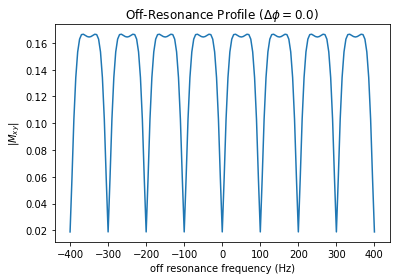

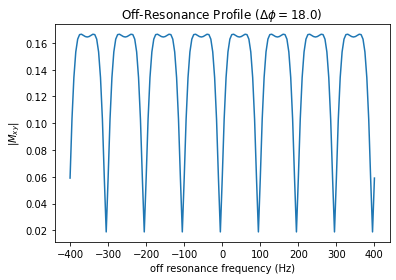

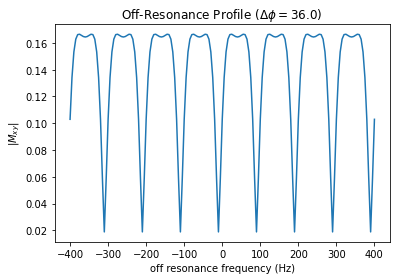

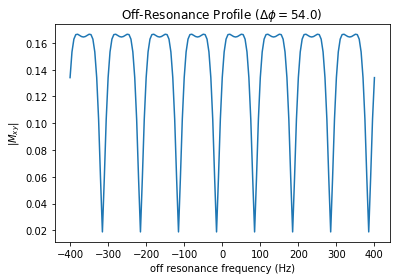

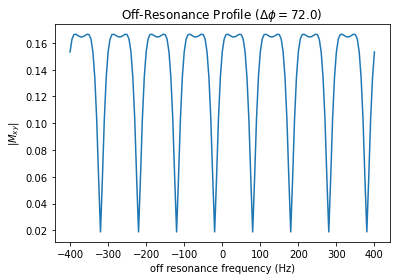

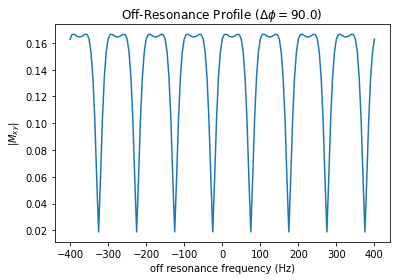

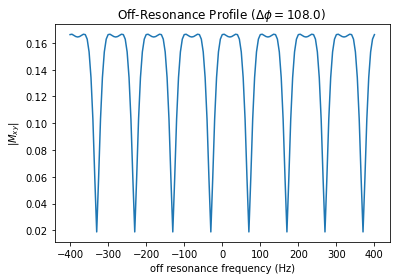

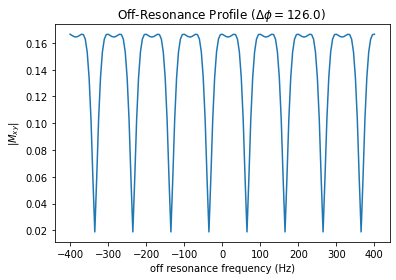

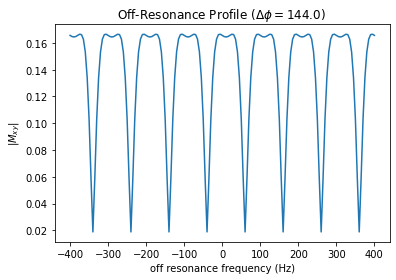

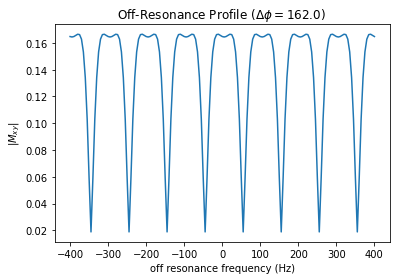

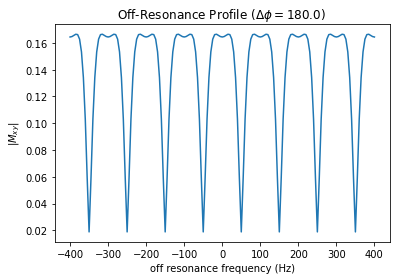

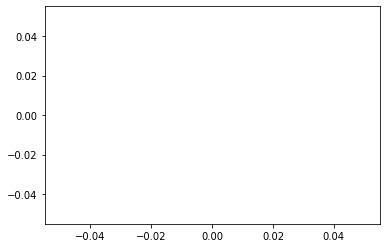

In [15]:
TR = 0.01
TE = TR/2
T1 = 1
T2 = 0.1
phasecycle = np.linspace(0, 180, 11)
tip_angle = [30]

#----------------------------------------------------------------------------------------------
#draw for different tip angle, 10, 30, 90
plot_number = 1
for a in tip_angle:
    #at same resonance frequency, store the Mx and My value at different phase-cycling value. Get 8 points. 
    planet_data_x = np.asarray([], dtype = float)
    planet_data_y = np.asarray([], dtype = float)
    
    for phase_cycle in phasecycle:
        #store value
        off_resonance_f = np.asarray([], dtype = int)
        #M_xy_all = np.asarray([], dtype = float)
        M_xy_steady = np.asarray([], dtype = float)

        #Find steady state value for different off-resonance 
        for f_off in np.arange(-400,405,5):
            M_pre = M0 #initial pre pulse magnetisation 
            #templorary store value
            M_xy = np.asarray([], dtype = float)

            phase_shift = 0

            #repeat 1000 times for each off-resonance frequency
            for k in range(1,150):
                #Tip

                M_post = RF_pulse(a,phase_shift) @ M_pre
                #Consider T1 recovery, T2 decay and precession
                #@ time TE 
                P_TE = Precession(f_off,TE) #precession matrix at t = TE
                E_TE = Relaxation(TE, T1, T2) #Relaxation matrix at t = TE

                M_TE = P_TE @ E_TE @ M_post + (np.identity(3) - E_TE) @ M0 #magnetisation at TE
                M_transverse = np.sqrt(M_TE[0]**2+M_TE[1]**2)

                #store value in the array
                M_xy = np.append(M_xy, M_transverse)

                #@ time TR 
                P_TR = Precession(f_off,TR) #precession matrix at t = TR
                E_TR = Relaxation(TR, T1, T2) #Relaxation matrix at t = TR
                M_TR = P_TR @ E_TR @ M_post + (np.identity(3) - E_TR) @ M0 #magnetisation at TR
                M_pre = M_TR
                phase_shift = phase_shift + phase_cycle
                if ((f_off == -380)&(k==200)):
                    planet_data_x = np.append(planet_data_x, M_TE[0])
                    planet_data_y = np.append(planet_data_y, M_TE[1])
            #END 
            
            M_xy_steady = np.append(M_xy_steady, M_xy[-1])

            off_resonance_f = np.append(off_resonance_f, f_off)
        #END

        #plot M_xy at steady state against off-resonance frequency
        plt.figure(plot_number)

        plt.plot(off_resonance_f, M_xy_steady)
        plt.xlabel("off resonance frequency (Hz)")
        plt.ylabel("$|M_{xy}|$")
        plt.title("Off-Resonance Profile ($\Delta\phi = $" + str(phase_cycle)+") ")
        

        #save figure
        #plt.savefig("PartThree_phasecycle"+str(phase_cycle)+"_TR_" + str(TR) + "_off_resonance_profile_tip_angle_" + str(a) + ".jpg")
        plt.show()
        plot_number = plot_number+1
    #END
    plt.figure(plot_number)
    plt.scatter(planet_data_x,planet_data_y)
    plt.show()
   
   